# Utils
## Base functions

In [1]:
def identity(x):
  return x

## Image utils

Please install : py-opencv

### Read & display images

In [2]:
# imread read images in RGB
from imageio import imread

def img_read(img_path):
    return imread(img_path)

In [3]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html
import numpy as np
import cv2

# cv2 read images in BGR
def img_read_cv(img_path, color_mode=cv2.IMREAD_COLOR):
    # cv2.IMREAD_UNCHANGED (-1) | cv2.IMREAD_GRAYSCALE (0) | cv2.IMREAD_COLOR (default : 1)
    img = cv2.imread(img_path, color_mode)
    return img

# change BGR to RGB
def img_color(img, color_mode=cv2.COLOR_BGR2RGB):
    # https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html
    img = cv2.cvtColor(img, color_mode)
    return img

In [4]:
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html
from matplotlib import pyplot as plt

def img_show(img, func=identity):
    plt.imshow(func(img))
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

# Tests

In [5]:
img_path = '../data/faces/elon_musk.jpeg'

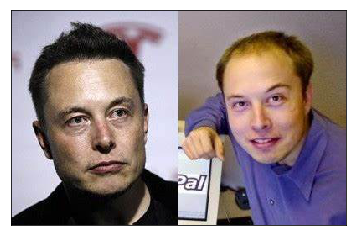

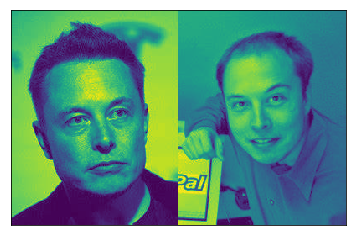

In [6]:
# READ COLOR
img = img_read_cv(img_path)
img = img_color(img)
img_show(img)

# READ GRAYSCALE
img = img_read_cv(img_path, cv2.IMREAD_GRAYSCALE)
img_show(img)

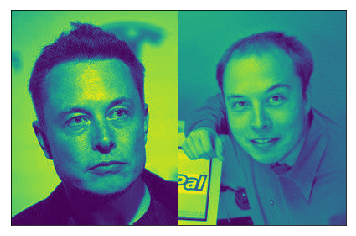

In [7]:
img = img_read_cv(img_path, cv2.IMREAD_UNCHANGED)
img = img_color(img, cv2.COLOR_BGR2GRAY)
img_show(img)